## Eigenvector centrality



In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



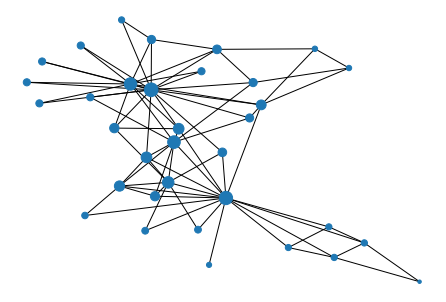

In [33]:
# use the "karate club" graph

kc = nx.karate_club_graph()
kc_ec = nx.eigenvector_centrality(kc)
kc_ec_vec = np.array([kc_ec[i] for i in kc_ec])

# draw with size proportional to eigvenctor centrality
scaling=500
nx.draw(kc, node_size=kc_ec_vec*scaling)

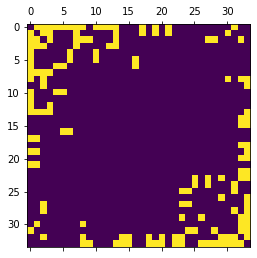

In [16]:
# get adjacency for KC network

kc_adj = nx.to_numpy_array(kc)
plt.matshow(kc_adj)

A relative centrality measure $x_v$ for vertex $v$ can be created according to the following equation:

$$
x_v = \frac{1}{\lambda}\sum_{t \in G}{a_{v,t}*x_t}
$$

where $a$ is the adjacency matrix for the graph $G$ and $\lambda$ is a constant.  That is, a nodes relatively centrality is the sum of all of its neighbors centralities.  It turns out that this can be written in matrix form as:

$$
Ax = \lambda x
$$

which is simply the eigenvector equation (where $\lambda$ are the eigenvalues).

In [30]:
eigvals, eigvecs = np.linalg.eig(kc_adj)
# the results have very tiny imaginary parts - get rid of those
eigvals = np.real(eigvals)
eigvecs = np.real(eigvecs)


The eigenvector centrality measure is simply the magnitude of the largest eigenvector.

In [35]:
largest_eigvec = eigvecs[:, np.argmax(eigvals)]
np.corrcoef(largest_eigvec, kc_ec_vec)

array([[1., 1.],
       [1., 1.]])